In [220]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Link Prediction

The question is how to predict the weak connection.
Traditional recommnedation system has high precision, however, it's not valuable to users who want to explore new topics since those recommendations usually have strong connecitons already. Thus, to explore/predict/recommend a weak connection (might be the one who has little number of the same neighbors, but it's highly interdisciplinary) would be more valuable for exploring new topics for users (especially when it comes to doing research, they need new ideas).   

#### TODO first
* transform network edge data into consine similarity, jaccard similarity
* count TF-IDF, log?
* make two networks in each time interval (2001-2010, 2011-2020), one is the direct network, the other is the cosine similarity network
* 

#### Explore later
1. QAP: traditional algorithm to calculate the correlation between two networks
Randomize the connections weight of two nodes, and make a correlation distribution. If it is deviant from the expectation value (meaning an outlier), then we can say it significant. 
2. ERGM: a recent algorithm to calculate the correlation between two networks

* adding clustering coefficient (CC), high CC means it's highly possible to form a cluster, which usually has fewer neighbors. Vise versa. 
* The network connection could be a representation of multiple relationships. (e.g. a conbination of co-citation, comments, bibliographic coupling, co-authorship etc.) It's called multiplex, heterogeneous relationship. 
* Correlation analysis of different algorithms (cosine, jaccard, ...) and see which kind of algorithm has stronger coefficient

In [18]:
import pandas as pd
import os

path = os.getcwd()
scientometric_path = path+'\\scientometric data\\'
files = os.listdir(scientometric_path)
file_paths = []
for file in files:
    print(scientometric_path+file+'\\networkfile.txt')
    file_paths.append(scientometric_path+file+'\\networkfile.txt')

C:\Users\Liser\Desktop\linchengwei_link_prediction\scientometric data\2010-2014\networkfile.txt
C:\Users\Liser\Desktop\linchengwei_link_prediction\scientometric data\2011-2015\networkfile.txt
C:\Users\Liser\Desktop\linchengwei_link_prediction\scientometric data\2012-2016\networkfile.txt
C:\Users\Liser\Desktop\linchengwei_link_prediction\scientometric data\2013-2017\networkfile.txt
C:\Users\Liser\Desktop\linchengwei_link_prediction\scientometric data\2014-2018\networkfile.txt
C:\Users\Liser\Desktop\linchengwei_link_prediction\scientometric data\2015-2019\networkfile.txt
C:\Users\Liser\Desktop\linchengwei_link_prediction\scientometric data\2016-2020\networkfile.txt


## Data Transform

In [24]:
# file_1 = "scientometrics_2001-2010network.txt"
# file_2 = "scientometrics_2011-2020networkfile.txt"

def file_transform(file):
    source_list, target_list, weight_list = [], [], []
    with open(file, 'r', encoding='utf-8') as f:
        f = f.read()
        for i, line in enumerate(f.split('\n')):
            for j, ele in enumerate(line.split('\t')):
                if i == 0:
                    ele = ele.replace('\ufeff', '')
                if j == 0:
                    source_list.append(ele)
                elif j== 1:
                    target_list.append(ele)
                elif j == 2:
                    weight_list.append(ele)
    source_list = source_list[:-1]
    return source_list, target_list, weight_list

def to_df(source_list, target_list, weight_list):
    
    df = pd.DataFrame(columns = ['source', 'target', 'weight'])
    df['source'] = source_list
    df['target'] = target_list
    df['weight'] = weight_list

    return df

# source_list, target_list, weight_list = file_transform(file_1)
# df = to_df(source_list, target_list, weight_list)

In [26]:
for f in file_paths:
    source_list, target_list, weight_list = file_transform(f)
    df = to_df(source_list, target_list, weight_list)
    break
df

,source,target,weight
0,1,599,1
1,1,600,1
2,1,2537,1
3,2,292,1
4,2,415,1
...,...,...,...
13429,3505,3508,3
13430,3505,3534,1
13431,3506,3508,1
13432,3508,3533,1


#### save

In [38]:
# df.to_excel(path+'\\output\\scientometrics_2010-2020.xlsx')

### Read from saved data

In [39]:
# df1 = pd.read_excel(path+'\\output\\scientometrics_2001-2010.xlsx', index_col=0)
# df2 = pd.read_excel(path+'\\output\\scientometrics_2010-2020.xlsx', index_col=0)

## Generate Cosine Similarity

In [28]:
# all nodes, 2001-2010
def generate_node(df):
    N = list(set(list(set(df['source']))+list(set(df['target']))))
    nodes = []
    for n in N:
        nodes.append(int(n))
    nodes = sorted(nodes)
    len(nodes)
    
    return nodes
nodes = generate_node(df)

In [4]:
# check if df2's node in df1's
df2_overlap = pd.DataFrame(columns = ['source', 'target', 'weight'])
for i in range(len(df2)):
    v_list = df2.loc[i].values
    A = v_list[0] in nodes
    B = v_list[1] in nodes
    if A & B:
        df2_overlap.loc[i] = list(df2.loc[i].values)
df2_overlap = df2_overlap.reset_index()
df2_overlap = df2_overlap[['source', 'target', 'weight']]

In [5]:
df2_overlap

,source,target,weight
0,1,274,1
1,1,276,1
2,2,656,1
3,3,109,1
4,5,656,1
...,...,...,...
519,764,766,1
520,764,767,1
521,766,767,1
522,780,787,1


In [7]:
def find_missing_nodes(nodes):
    missing_nodes = []
    print('find missing nodes')
    for i in range(len(nodes)):
        if i not in nodes:
            print(i)
            missing_nodes.append(i)
    return missing_nodes
missing_nodes = find_missing_nodes(nodes)
# missing_nodes = [0,735]
import numpy as np
def create_matrix(missing_nodes):
    t = pd.DataFrame(np.zeros((len(nodes)+2,len(nodes)+2)))
    t = t.drop(columns=missing_nodes)
    t = t.drop(missing_nodes)
    return t
t1 = create_matrix(missing_nodes)

find missing nodes
0
735


In [37]:
len(nodes)

3547

In [42]:
import numpy as np
def create_empty_matrix(nodes):
    t = pd.DataFrame(np.zeros((len(nodes), len(nodes))))
    t.columns = nodes
    t.index = nodes
    return t
t1 = create_empty_matrix(nodes)
t2 = create_empty_matrix(nodes)

##

In [322]:
matrix1 = pd.DataFrame()
for i in nodes:
    for j in nodes:
        matrix1.at[str(i), str(j)] = int(0)
matrix2 = pd.DataFrame()
for i in nodes:
    for j in nodes:
        matrix2.at[str(i), str(j)] = int(0)

##

In [ ]:
for i in nodes:
    # print(i)
    A = df1['source']==str(i)
    for k in range(len(df1[A]['target'])):
        j = df1[A]['target'].iloc[k]
        weight = df1[A]['weight'].iloc[k]
        print(i, j, weight)
        # print(df[A]['target'].iloc[k], df[A]['weight'].iloc[k])
        t1.at[i, j] = int(weight)
        t1.at[i, j] = int(weight)

In [15]:
def add_weight(df, t):
    # add weight
    for i in nodes:
        # print(i)
        A = df['source']==str(i)
        for k in range(len(df[A]['target'])):
            j = df[A]['target'].iloc[k]
            weight = df[A]['weight'].iloc[k]
            print(i, j, weight)
            # print(df[A]['target'].iloc[k], df[A]['weight'].iloc[k])
            t.at[i, j] = int(weight)
            t.at[i, j] = int(weight)
    return t
direct_matrix_1 = add_weight(df1, t1)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370


In [16]:
direct_matrix_1

,1,2,3,4,5,6,7,8,9,10,...,796,797,798,799,800,801,802,803,804,805
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [303]:
# direct_matrix[direct_matrix['1']==1.0]

In [222]:
# vec_a = matrix['1']
# vec_b = matrix['2']
# round(cosine_similarity([vec_a], [vec_b])[0][0], ndigits=3)

#### method2

In [304]:
from sklearn.metrics.pairwise import cosine_similarity
def calculate_cosine_sim(direct_matrix):
    matrix_cosine = matrix2
    for i in nodes:
        print(i)
        vec_a = direct_matrix[str(i)]
        for j in nodes:
            vec_b = direct_matrix[str(j)]
            cosine_sim = cosine_similarity([vec_a], [vec_b])
            cosine_sim = round(cosine_sim[0][0], ndigits=3)
            matrix_cosine.at[str(i), str(j)] = cosine_sim
            matrix_cosine.at[str(j), str(i)] = cosine_sim
    return matrix_cosine
matrix_cosine = calculate_cosine_sim(direct_matrix)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [305]:
matrix_cosine.to_excel(path+'\\output\\cosine_matrix_2010-2020.xlsx')

#### sample code

In [180]:
# from sklearn.metrics.pairwise import cosine_similarity
# # Vectors
# vec_a = matrix['1']
# vec_b = matrix['5']

# # Dot and norm
# dot = sum(a*b for a, b in zip(vec_a, vec_b))
# norm_a = sum(a*a for a in vec_a) ** 0.5
# norm_b = sum(b*b for b in vec_b) ** 0.5

# # Cosine similarity
# cos_sim = dot / (norm_a*norm_b)

# # Results
# print('My version:', cos_sim)
# print('Scikit-Learn:', cosine_similarity([vec_a], [vec_b]))

My version: 0.0
Scikit-Learn: [[0.]]


In [165]:
matrix_cosine[matrix_cosine['2']!=0]

,1,2,3,4,5,6,7,8,9,10,...,796,797,798,799,800,801,802,803,804,805
1,0.000,0.875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
97,0.301,0.279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.177,0.0,0.0,0.0,0.0,0.063,0.0,0.0,0.0
122,0.834,0.828,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
123,0.678,0.659,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
278,0.704,0.686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
279,0.264,0.235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
316,0.769,0.747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
680,0.766,0.741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0


### Visualize

In [172]:
matrix_cosine

,1,2,3,4,5,6,7,8,9,10,...,796,797,798,799,800,801,802,803,804,805
1,0.000,0.875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.875,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
802,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
803,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
804,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


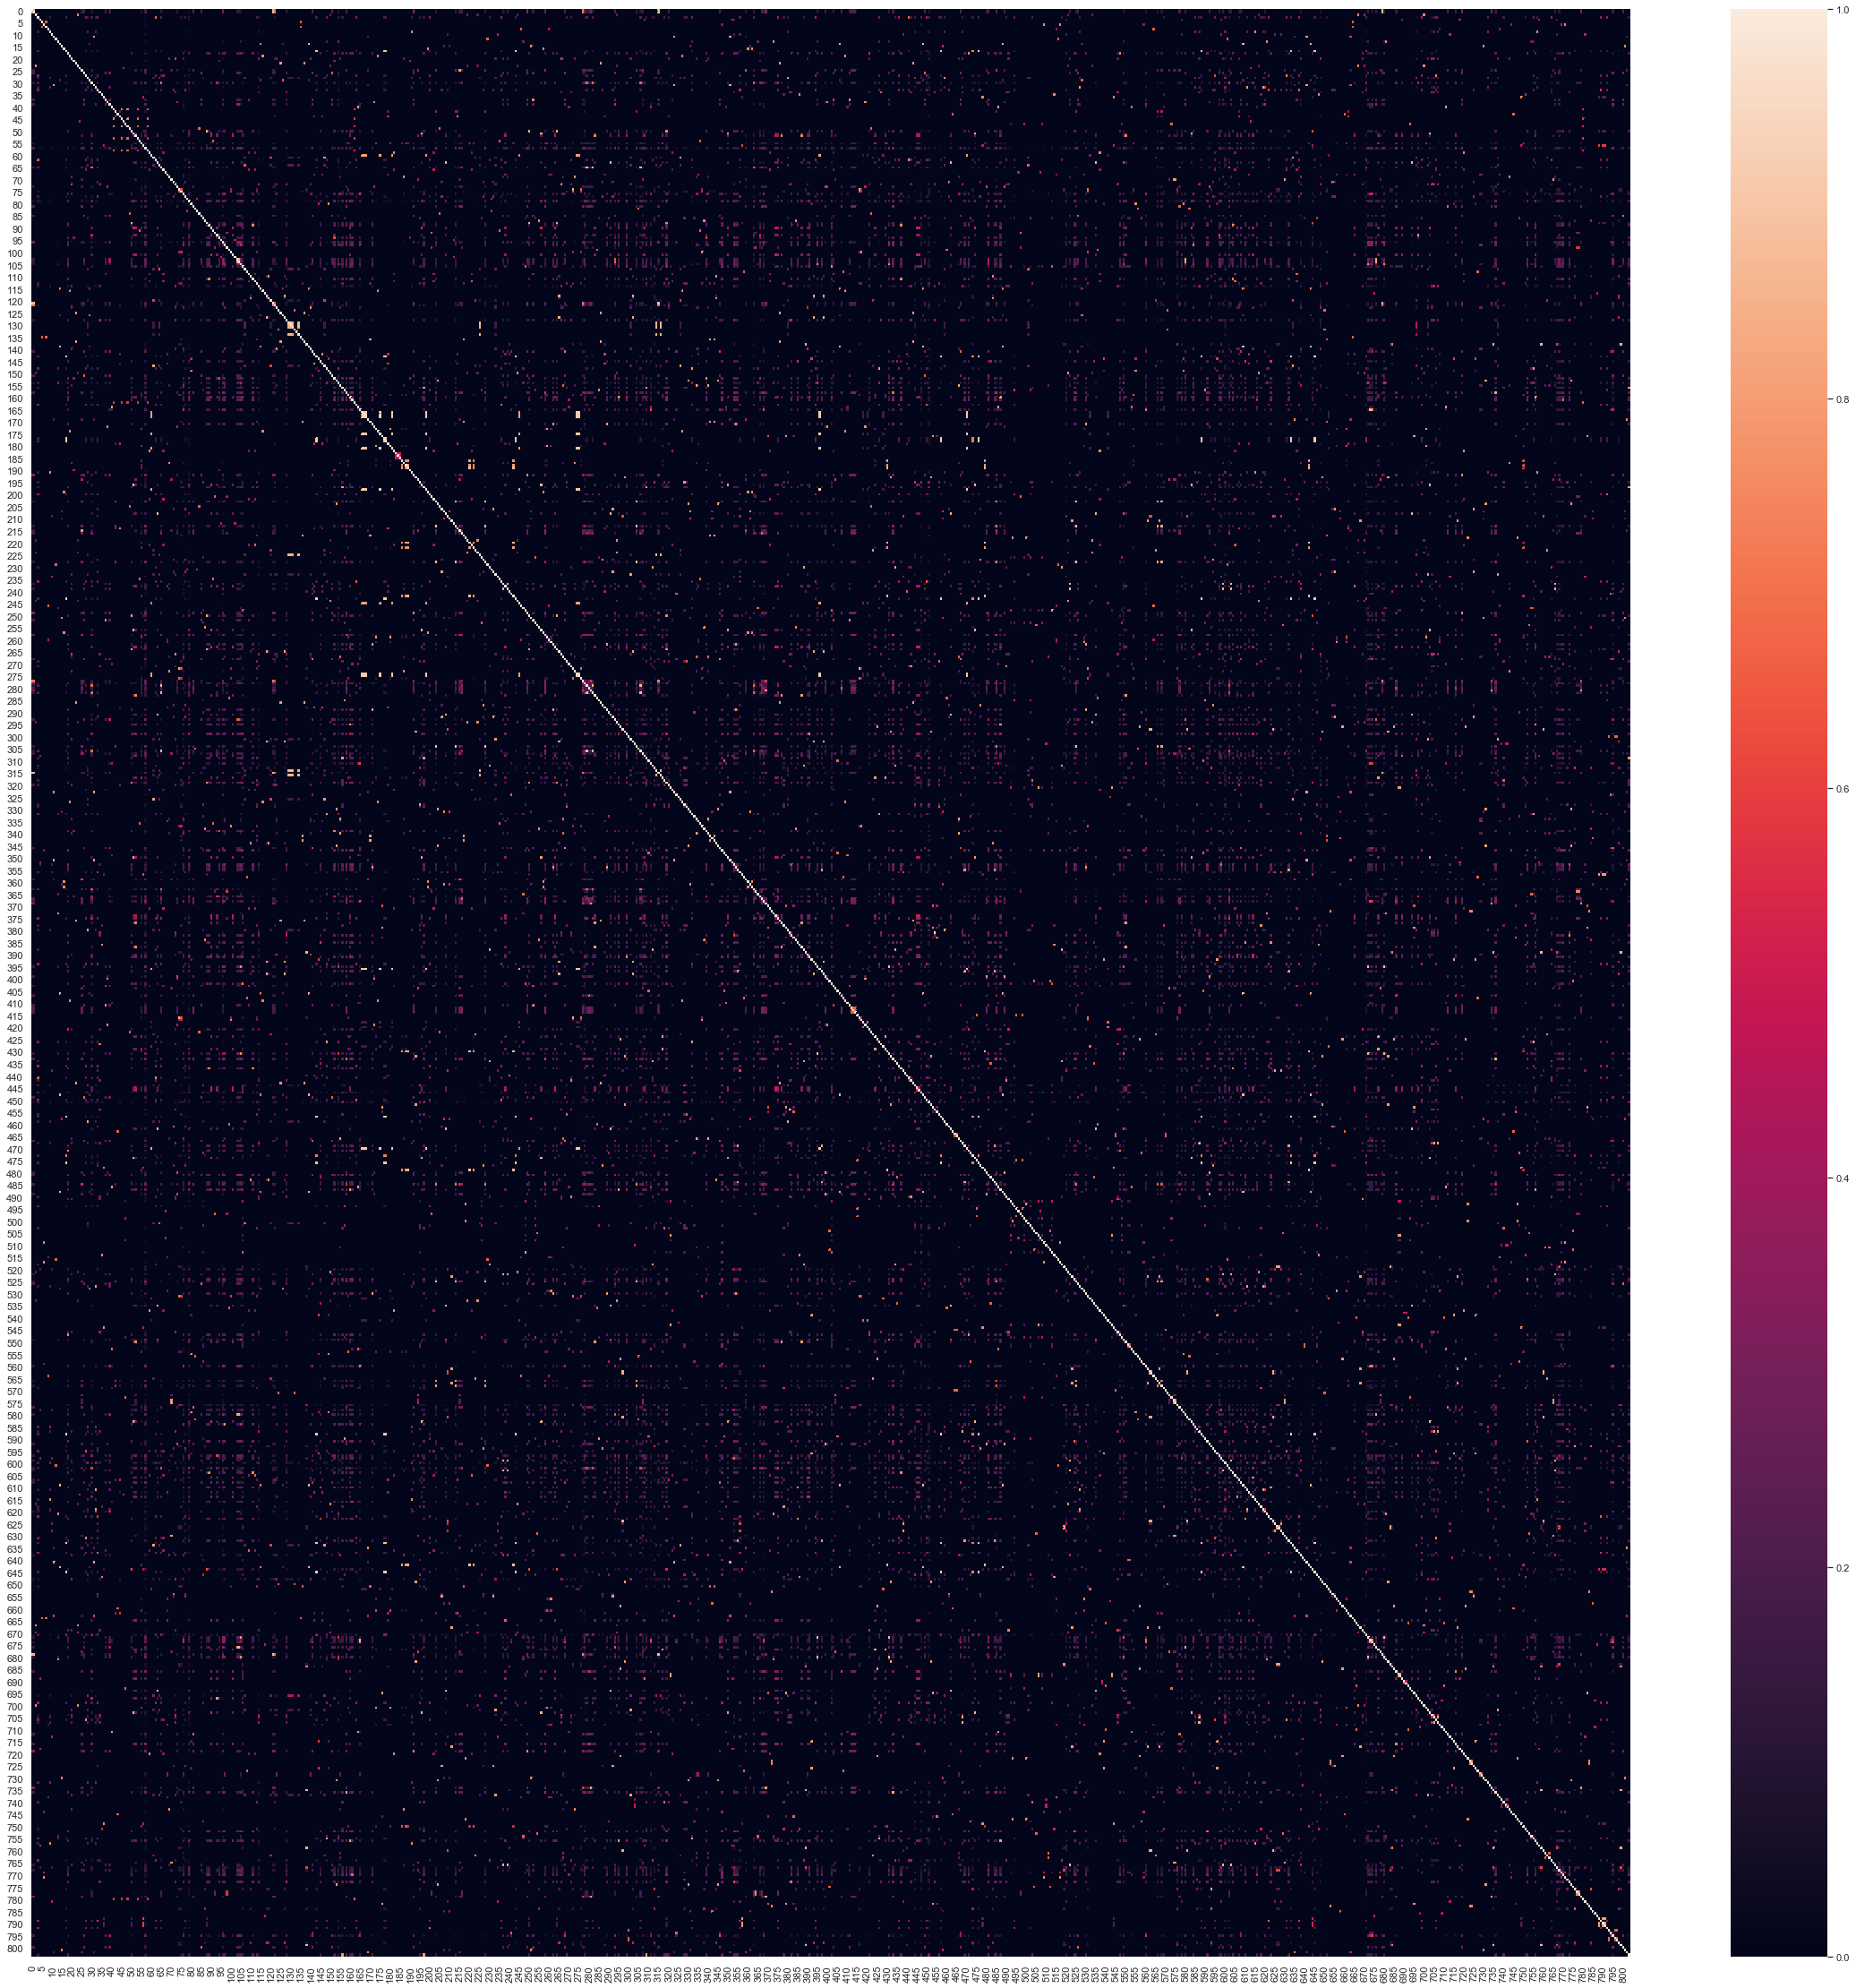

In [221]:
# import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
# uniform_data = np.random.rand(10, 12)
fig, ax = plt.subplots(figsize=(40,40))
ax = sns.heatmap(matrix_cosine.values)

## Generate